# Comparison of graphics libraries for Python:

In [17]:
import pandas as pd 

# matplotlib - requires 3.1.0 or above
import numpy as np
import matplotlib.pyplot as plt

# seaborn - requires 0.9.0 or above
import seaborn as sns
sns.set(style='whitegrid')

# bokeh - uses 1.2.0
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
# render the plot in Jupyter Notebook instead of html file
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

## Load data

In [18]:
# get initial data
df = sns.load_dataset('tips')
df['tip_pct'] = df['tip'] / df['total_bill'] * 100
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


## Scatter plot

### Using Matplotlib

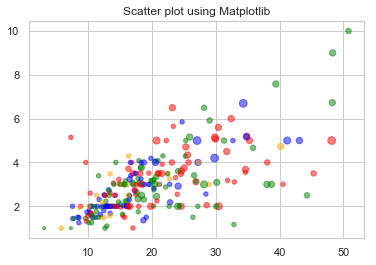

In [19]:
# mapping day to color
col_map = {'Thur': 'blue', 'Fri': 'orange', 'Sat': 'green', 'Sun': 'red'}
col = df['day'].apply(lambda x: col_map[x])

plt.scatter(x=df['total_bill'], y=df['tip'], c=col, alpha=0.5, s=df['size'] * 10) 
plt.title('Scatter plot using Matplotlib')
plt.show()

### Using Seaborn

Text(0.5, 1.0, 'Scatter plot using Seaborn')

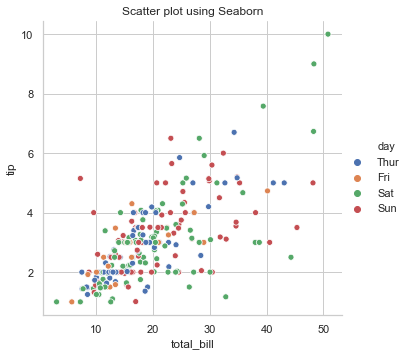

In [20]:
sns.relplot(data=df, x='total_bill', y='tip', hue='day')
plt.title('Scatter plot using Seaborn')

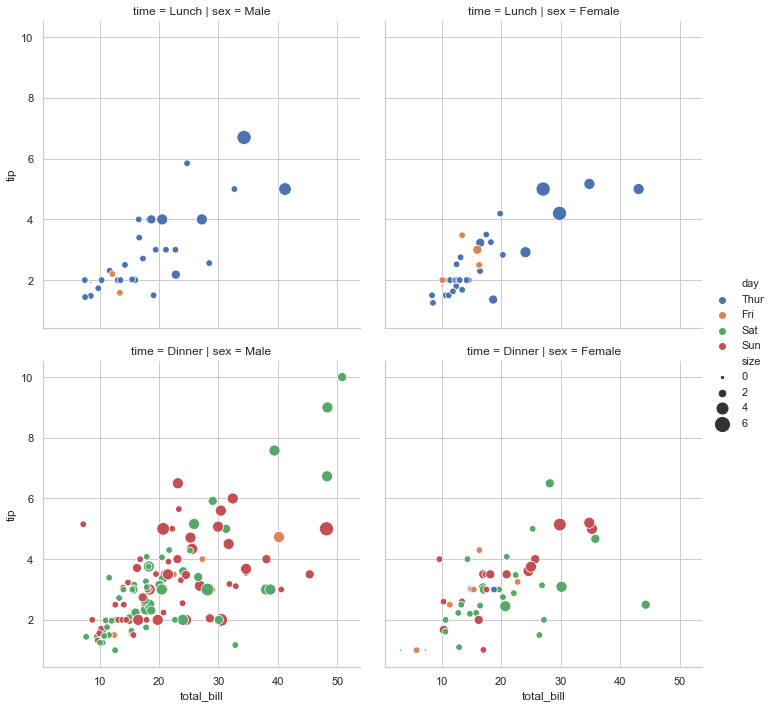

In [21]:
sns.relplot(data=df, x='total_bill', y='tip', hue='day', col='sex', row='time', size='size', sizes=(5,200))

### Using Bokeh

In [40]:
# using ColumDataSource 
# graph information must be part of the CDS
df_plot = df.copy()
df_plot['point_color'] = col
df_plot['point_size'] = df['size'] * 0.2
src = ColumnDataSource(df_plot)

#define information displayed by the hoover tool
tool_tips = [ ('tip', '$y'),
              ('total bill', '$y'),
              ('day', '@day'),
              ('size', '@size'),
]

p = figure(toolbar_location='left', tooltips=tool_tips)

p.scatter( x='total_bill', y='tip',
         fill_color='point_color',  # using the color map done for matplotlib
         radius='point_size',
         source=src,
         fill_alpha=0.5)
p.title.text = 'Scatter plot using Bokeh (1)'
p.title.align='center'
p.xaxis.axis_label = 'Bill amount'
p.yaxis.axis_label = 'Tip amount'
show(p)

In [62]:
# using Glyph as interactive legend is not available with CDS

#define information displayed by the hoover tool
tool_tips = [ ('tip', '$y'),
              ('total bill', '$y')]

p2 = figure(toolbar_location='left', tooltips=tool_tips)

for day in ['Thur','Fri','Sat','Sun']:
    df_plot = df[ df['day'] == day].copy() 
    df_plot['point_size'] = df_plot['size'] * 3
    p2.circle( df_plot['total_bill'], 
              df_plot['tip'], 
              size=df_plot['point_size'], 
              color=col_map[day], 
              legend=day,
              alpha=0.5)

p2.title.text = 'Scatter plot using Bokeh, with interactive legend (2)'
p2.title.align='center'
p2.xaxis.axis_label = 'Bill amount'
p2.yaxis.axis_label = 'Tip amount'
p2.legend.click_policy="hide"
show(p2)